In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [7]:
dates1 = [f'2019-01-{i:02d}' for i in range(1, 32)]
dates2 = [f'2019-02-{i:02d}' for i in range(1, 29)]
dates3 = [f'2019-03-{i:02d}' for i in range(1, 32)]
dates4 = [f'2019-04-{i:02d}' for i in range(1, 31)]
dates = dates1 + dates2 + dates3 + dates4

In [8]:
def plot_heatmap(matrix, title, labels, with_values = False, save = False, directory = None):
    plt.figure(figsize=(10, 8))
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    if matrix.shape[1] > 31:
        plt.xticks(np.arange(0, matrix.shape[1], 2), labels[::2], rotation=90)
        plt.yticks(np.arange(0, matrix.shape[0], 2), labels[::2])
    else:
        plt.xticks(np.arange(matrix.shape[1]), labels, rotation=90)
        plt.yticks(np.arange(matrix.shape[0]), labels)
    #plt.xticks(np.arange(matrix.shape[1]), labels, rotation=90)
    #plt.yticks(np.arange(matrix.shape[0]), labels)
    plt.xticks(np.arange(matrix.shape[1]))
    plt.yticks(np.arange(matrix.shape[0]))
    if with_values:
        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                plt.text(j, i, f'{matrix[i, j]:.1f}', ha='center', va='center', color='white')
    plt.tight_layout()
    if save:
        os.makedirs(directory, exist_ok=True)
        plt.savefig(os.path.join(directory, title + '.pdf'), bbox_inches='tight')
    else:
        plt.title(title)
        plt.show()
    plt.close()

In [3]:
dir = '/home/user/Desktop/Datos/'
#dir = '/Users/antoniomendez/Desktop/Tesis/Datos/datos_limpios/'

In [10]:
data_2019_mibici = pd.read_csv(dir + 'mibici/mibici_2019.csv')
data_2019_eco = pd.read_csv(dir + 'ecobici/ecobici_2019.csv')

In [4]:
h1 = data_2019_mibici.head()
latex1 = h1.to_latex(index=False)
print(latex1)

\begin{tabular}{rrlrllrrr}
\toprule
Viaje_Id & Usuario_Id & Genero & Año_de_nacimiento & Inicio_del_viaje & Fin_del_viaje & Origen_Id & Destino_Id & Tiempo_viaje \\
\midrule
8901295 & 341162 & M & 1992.000000 & 2019-01-01 00:00:00 & 2019-01-01 00:16:09 & 50 & 54 & 16.150000 \\
8901296 & 413443 & M & 1985.000000 & 2019-01-01 06:01:05 & 2019-01-01 06:16:27 & 38 & 194 & 15.366667 \\
8901297 & 444232 & M & 1995.000000 & 2019-01-01 06:01:19 & 2019-01-01 06:09:55 & 86 & 18 & 8.600000 \\
8901298 & 437533 & M & 1998.000000 & 2019-01-01 06:01:25 & 2019-01-01 06:02:04 & 86 & 86 & 0.650000 \\
8901299 & 430224 & M & 1992.000000 & 2019-01-01 06:01:57 & 2019-01-01 06:05:01 & 27 & 52 & 3.066667 \\
\bottomrule
\end{tabular}



In [5]:
h2 = data_2019_eco.head(3)
latex2 = h2.to_latex(index=False)
print(latex2)

\begin{tabular}{lrrrllrllr}
\toprule
Genero_Usuario & Edad_Usuario & Bici & Ciclo_Estacion_Retiro & Fecha_Retiro & Hora_Retiro & Ciclo_Estacion_Arribo & Fecha_Arribo & Hora_Arribo & Tiempo_viaje \\
\midrule
M & 36 & 11444 & 67 & 2019-01-01 & 0:08:44 & 36 & 2019-01-01 & 0:14:03 & 5.316667 \\
M & 36 & 9196 & 55 & 2019-01-01 & 0:12:05 & 136 & 2019-01-01 & 0:42:11 & 30.100000 \\
M & 38 & 2612 & 29 & 2019-01-01 & 0:13:15 & 115 & 2019-01-01 & 0:37:47 & 24.533333 \\
\bottomrule
\end{tabular}



In [44]:
names_mibici = [dir + f'mibici/mibici_{i}.csv' for i in range(2019, 2025)]

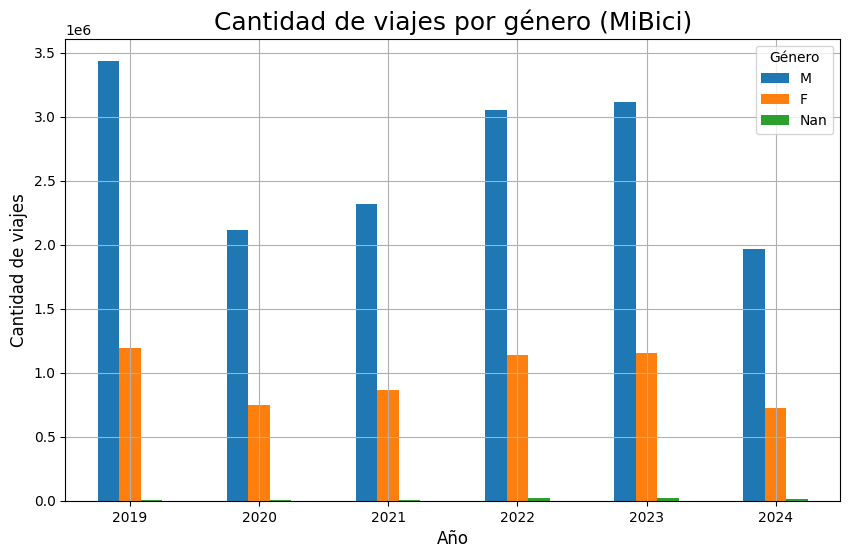

In [ ]:
# tarda como 1 minuto y medio
# Crear un diccionario para almacenar los conteos de cada género
gender_counts = {'M': [], 'F': [], 'Nan': []}

# Iterar sobre cada archivo en names_mibici
for file in names_mibici:
    # Cargar el dataset
    df = pd.read_csv(file)
    
    # Contar los valores de cada género
    counts = df['Genero'].value_counts()
    counts_nan = df['Genero'].isna().sum()
    
    # Agregar los conteos al diccionario
    gender_counts['M'].append(counts.get('M', 0))
    gender_counts['F'].append(counts.get('F', 0))
    gender_counts['Nan'].append(counts_nan)

# Crear un DataFrame con los conteos
#index = [f'Año {i+2019}' if i+2019 != 2024 else 'Año 2024 (hasta Julio)' for i in range(len(names_mibici))]
gender_counts_df = pd.DataFrame(gender_counts, index=[f'{i+2019}' for i in range(len(names_mibici))])

# Plotear el histograma
gender_counts_df.plot(kind='bar', figsize=(10, 6))
plt.title('Cantidad de viajes por género (MiBici)', fontsize=18)
#plt.yscale('log')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de viajes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Género')
plt.grid()
plt.savefig('graficas/viajes_por_genero_mibici_nolog.pdf', bbox_inches='tight')
plt.show()

In [46]:
names_ecobici = [dir + f'ecobici/ecobici_{i}.csv' for i in range(2019, 2025)]

/tmp/ipykernel_41269/739077127.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


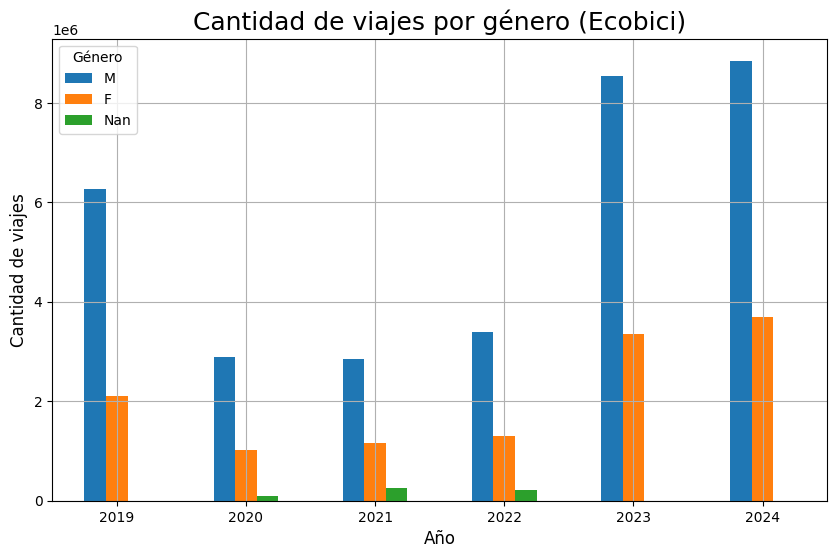

In [ ]:
# tarda como 3 minutos
# Crear un diccionario para almacenar los conteos de cada género
gender_counts = {'M': [], 'F': [], 'Nan': []}

# Iterar sobre cada archivo en names_mibici
for file in names_ecobici:
    # Cargar el dataset
    df = pd.read_csv(file)
    
    # Contar los valores de cada género
    counts = df['Genero_Usuario'].value_counts()
    counts_nan = df['Genero_Usuario'].isna().sum()
    
    # Agregar los conteos al diccionario
    gender_counts['M'].append(counts.get('M', 0))
    gender_counts['F'].append(counts.get('F', 0))
    gender_counts['Nan'].append(counts_nan)

# Crear un DataFrame con los conteos
#index = [f'Año {i+2019}' if i+2019 != 2024 else 'Año 2024 (hasta Julio)' for i in range(len(names_mibici))]
gender_counts_df = pd.DataFrame(gender_counts, index=[f'{i+2019}' for i in range(len(names_mibici))])

# Plotear el histograma
gender_counts_df.plot(kind='bar', figsize=(10, 6))
plt.title('Cantidad de viajes por género (Ecobici)', fontsize=18)
#plt.yscale('log')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de viajes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Género')
plt.grid()
plt.savefig('graficas/viajes_por_genero_ecobici_nolog.pdf', bbox_inches='tight')
plt.show()

In [4]:
data_mibici_2024 = pd.read_csv(dir + 'mibici/mibici_2024.csv')
data_ecobici_2024 = pd.read_csv(dir + 'ecobici/ecobici_2024.csv')

In [5]:
# compute the counts of trips between stations
def count_trips_ecobici(data_user, threshold = 5, complement = False):
    viajes_user = data_user.groupby([data_user[['Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo']].min(axis=1), data_user[['Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo']].max(axis=1)]).size().reset_index(name='counts')
    viajes_user.columns = ['Est_A', 'Est_B', 'counts']
    if not complement:
        viajes_user = viajes_user[viajes_user['counts'] >= threshold]
    else:
        viajes_user = viajes_user[viajes_user['counts'] < threshold]
    if viajes_user.empty:
        return None
    total = viajes_user['counts'].sum()
    viajes_user['prob'] = viajes_user['counts']/total
    viajes_user = viajes_user.sort_values(by = 'prob', ascending = False).reset_index(drop=True)
    return viajes_user

def count_trips_mibici(data_user, threshold = 5, complement = False):
    viajes_user = data_user.groupby([data_user[['Origen_Id', 'Destino_Id']].min(axis=1), data_user[['Origen_Id', 'Destino_Id']].max(axis=1)]).size().reset_index(name='counts')
    viajes_user.columns = ['Est_A', 'Est_B', 'counts']
    if not complement:
        viajes_user = viajes_user[viajes_user['counts'] >= threshold]
    else:
        viajes_user = viajes_user[viajes_user['counts'] < threshold]
    if viajes_user.empty:
        return None
    total = viajes_user['counts'].sum()
    viajes_user['prob'] = viajes_user['counts']/total
    viajes_user = viajes_user.sort_values(by = 'prob', ascending = False).reset_index(drop=True)
    return viajes_user

def leer_matriz(nombre_archivo):
    matriz = []
    with open(nombre_archivo, 'r') as archivo:
        archivo.readline()
        archivo.readline()
        for linea in archivo:
            fila = [float(valor) for valor in linea.strip().split()]
            matriz.append(fila)
    return matriz

def encontrar_estacion(est, matriz):
    for i in range(len(matriz)):
        if matriz[i][0] == est:
            return matriz[i][1], matriz[i][2]
    return None, None

def plot_counter(counter_user, est, title, save = False, dir = None, title_add = None):
    vertex = list(set(counter_user['Est_A'].unique().tolist() + counter_user['Est_B'].unique().tolist()))
    opacity = np.linspace(0.1, 0.5, len(counter_user))
    #print(vertex)
    total_trips = counter_user['counts'].sum()
    plt.figure(figsize=(10, 6))
    for i in vertex:
        esta = encontrar_estacion(i, est)
        #print(esta)
        plt.scatter(esta[1], esta[0], color='blue')
        plt.text(esta[1] + 0.00001, esta[0] + 0.00001, str(i), fontsize=7, ha='left', va='bottom')
    for i in range(len(counter_user)):
        current_trip = counter_user.iloc[i]
        prob = current_trip["prob"]
        estA = current_trip["Est_A"]
        estB = current_trip["Est_B"]
        if estA == estB:
            plt.scatter(encontrar_estacion(estA, est)[1], encontrar_estacion(estA, est)[0], color='red', marker='*', s=100)
        else:
            aux = np.array([encontrar_estacion(estA, est), encontrar_estacion(estB, est)])
            plt.plot(aux[:,1], aux[:,0], color='black', alpha=opacity[i])
    plt.scatter([], [], color='red', marker='*', s=100, label='Estación de inicio y fin iguales')
    plt.grid()
    plt.legend()
    if title_add is not None:
        plt.title(f'{title} {title_add}', fontsize=18)
    else:
        plt.title(f'{title}', fontsize=18)
    plt.xlabel('Longitud', fontsize=12)
    plt.ylabel('Latitud', fontsize=12)
    if save:
        directory = f'{dir}/'
        if not os.path.exists(directory):
            os.makedirs(directory)
        plt.savefig(f'{directory}/{title}.pdf')
        plt.close()
    else:
        plt.show()

In [6]:
est_2024_mibici = leer_matriz(dir + 'Adj_mibici/matrices_estaciones/est_2024.txt')
est_2024_ecobici = leer_matriz(dir + 'Adj_eco/matrices_estaciones/est_2024.txt')

In [24]:
data_mibici_2024.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,A}äe_nacimiento,Tiempo_viaje
0,31789291,640715,M,1984.0,2024-01-01 00:05:25,2024-01-01 00:29:37,294,271,NaN,24.200000
1,31789292,2353010,F,1995.0,2024-01-01 00:07:23,2024-01-01 00:16:37,182,254,NaN,9.233333
2,31789293,1556365,M,1984.0,2024-01-01 00:07:31,2024-01-01 00:16:37,182,254,NaN,9.100000
3,31789294,2626233,M,1994.0,2024-01-01 00:07:56,2024-01-01 00:31:51,35,154,NaN,23.916667
4,31789295,2602006,M,1998.0,2024-01-01 00:08:09,2024-01-01 00:31:51,35,154,NaN,23.700000


In [25]:
data_ecobici_2024.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Tiempo_viaje
0,M,48.0,3371879,113,2023-12-31,23:21:52,659,2024-01-01,00:00:02,38.166667
1,F,26.0,7033434,281,2023-12-31,23:46:02,47,2024-01-01,00:00:02,14.000000
2,F,37.0,7169857,15,2023-12-31,23:51:57,217,2024-01-01,00:00:49,8.866667
3,F,30.0,6368211,555,2023-12-31,23:53:10,8,2024-01-01,00:02:39,9.483333
4,M,30.0,5136924,555,2023-12-31,23:52:53,8,2024-01-01,00:02:45,9.866667


In [7]:
mibici_2024 = data_mibici_2024[data_mibici_2024['Inicio_del_viaje'].str.contains('2024-01-01')]
ecobici_2024 = data_ecobici_2024[data_ecobici_2024['Fecha_Retiro'].str.contains('2024-01-01')]

In [8]:
counter_mibici_2024 = count_trips_mibici(mibici_2024, threshold = 1)
counter_ecobici_2024 = count_trips_ecobici(ecobici_2024, threshold = 1)

In [9]:
plot_counter(counter_mibici_2024, est_2024_mibici, 'MiBici 01-01-2024', save = True, dir = 'graficas/mibici_2024')
plot_counter(counter_ecobici_2024, est_2024_ecobici, 'Ecobici 01-01-2024', save = True, dir = 'graficas/ecobici_2024')

In [14]:
str_2019 = dir + 'mibici/mibici_2019.csv'
d_2019 = pd.read_csv(str_2019)
d = d_2019[d_2019['Inicio_del_viaje'].str.contains('2019-01')]
users = d['Usuario_Id'].unique()
print(len(users))

17433


In [35]:
def compute_entropy(counter_user, normalized = False):
    '''
    args:
    counter_user: DataFrame with columns Est_A, Est_B, counts, prob given by count_trips_mibici by a specific user
    total_counter: DataFrame with columns Est_A, Est_B, counts, prob given by count_trips_mibici by all users
    return:
    entropy: float with the entropy
    '''
    entropy = 0
    N = len(counter_user)
    if N == 0:
        return None
    else:
        for i in range(N):
            prob = counter_user.iloc[i]['prob']
            entropy -= prob * np.log(prob)
        if N > 1 and normalized:
            entropy /= np.log(N)
        return entropy

In [ ]:
# tarda como 2 minutos y medio
entropies = []
for user in users:
    counter_user = count_trips_mibici(d[d['Usuario_Id'] == user])
    if counter_user is not None:
        entropy = compute_entropy(counter_user)
        if entropy is not None:
            entropies.append(entropy)

In [12]:
entropies_norm = []
for user in users:
    counter_user = count_trips_mibici(d[d['Usuario_Id'] == user], threshold=1)
    if counter_user is not None:
        entropy = compute_entropy(counter_user, normalized=True)
        if entropy is not None:
            entropies_norm.append(entropy)

In [13]:
len(entropies)

1268

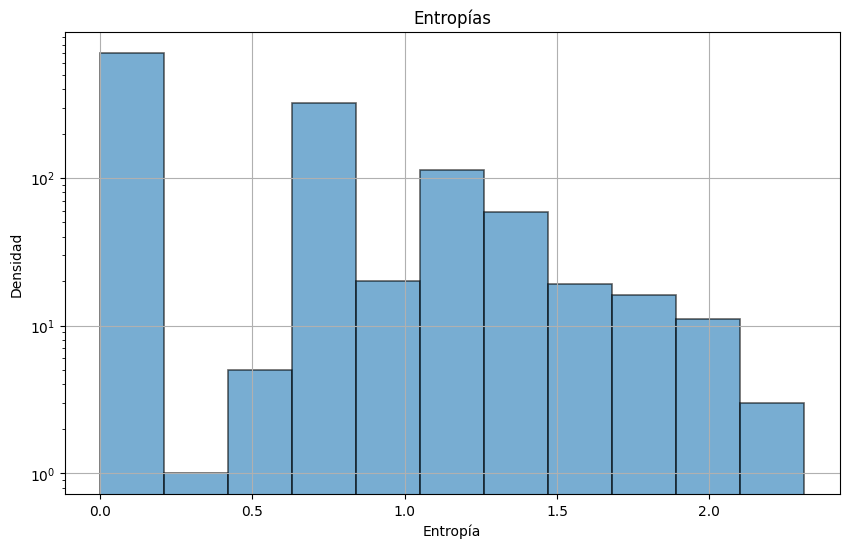

In [ ]:
plt.figure(figsize=(10, 6))
bins = np.log2(len(entropies)).astype(int) + 1
plt.hist(entropies, bins=bins, alpha=0.6, edgecolor='black', linewidth=1.2)
plt.scatter(entropies, np.zeros(len(entropies)), color='red', alpha=0.1)
plt.xlabel('Entropía')
plt.ylabel('Densidad')
plt.yscale('log')
plt.title('Entropías')
plt.grid()
plt.show()

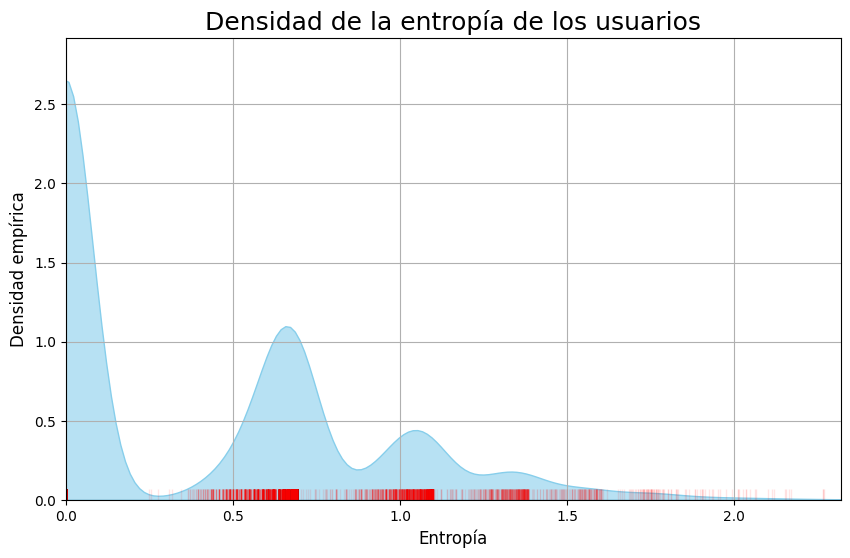

In [41]:
plt.figure(figsize=(10, 6))

# Gráfica de densidad empírica
sns.kdeplot(entropies, fill=True, color='skyblue', alpha=0.6)

# Marca de puntos en el eje horizontal
#plt.scatter(entropies, np.zeros(len(entropies)), color='red', alpha=0.1)
sns.rugplot(entropies, color='red', alpha=0.1)

plt.xlabel('Entropía', fontsize=12)
plt.ylabel('Densidad empírica', fontsize=12)
plt.xlim(0, np.max(entropies))
plt.title('Densidad de la entropía de los usuarios', fontsize=18)
plt.grid(True)
plt.savefig('graficas/entropias_mibici_2019.pdf', bbox_inches='tight')
plt.show()

In [39]:
entropies_nonzero = [x for x in entropies if x > 0]

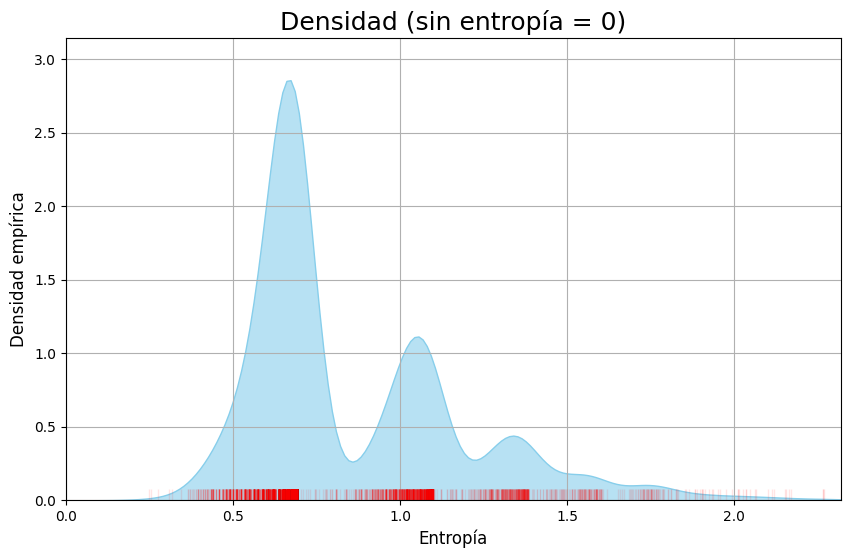

In [43]:
plt.figure(figsize=(10, 6))

# Gráfica de densidad empírica
sns.kdeplot(entropies_nonzero, fill=True, color='skyblue', alpha=0.6)

# Marca de puntos en el eje horizontal
#plt.scatter(entropies_nonzero, np.zeros(len(entropies_nonzero)), color='red', alpha=0.1)
sns.rugplot(entropies_nonzero, color='red', alpha=0.1)

plt.xlabel('Entropía', fontsize=12)
plt.ylabel('Densidad empírica', fontsize=12)
plt.title('Densidad (sin entropía = 0)', fontsize=18)
plt.xlim(0, np.max(entropies_nonzero))
plt.grid(True)
plt.savefig('graficas/entropias_mibici_2019_sin_ceros.pdf', bbox_inches='tight')
plt.show()

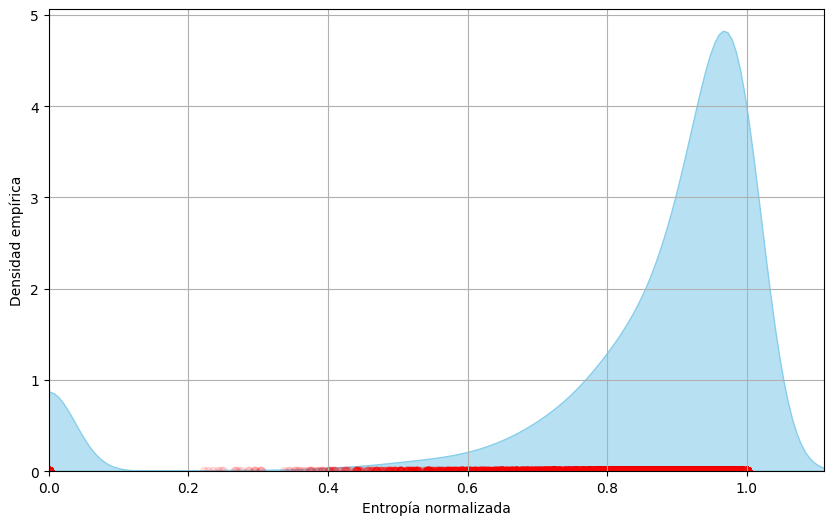

In [19]:
plt.figure(figsize=(10, 6))

# Gráfica de densidad empírica
sns.kdeplot(entropies_norm, fill=True, color='skyblue', alpha=0.6)

# Marca de puntos en el eje horizontal
plt.scatter(entropies_norm, np.zeros(len(entropies_norm)), color='red', alpha=0.1)

plt.xlabel('Entropía normalizada')
plt.ylabel('Densidad empírica')
plt.xlim(0, 1.11)
plt.grid(True)
plt.savefig('graficas/entropias_normalizada_mibici_2019.pdf', bbox_inches='tight')
plt.show()

In [14]:
entropies_norm_nonzero = [x for x in entropies_norm if x > 0]

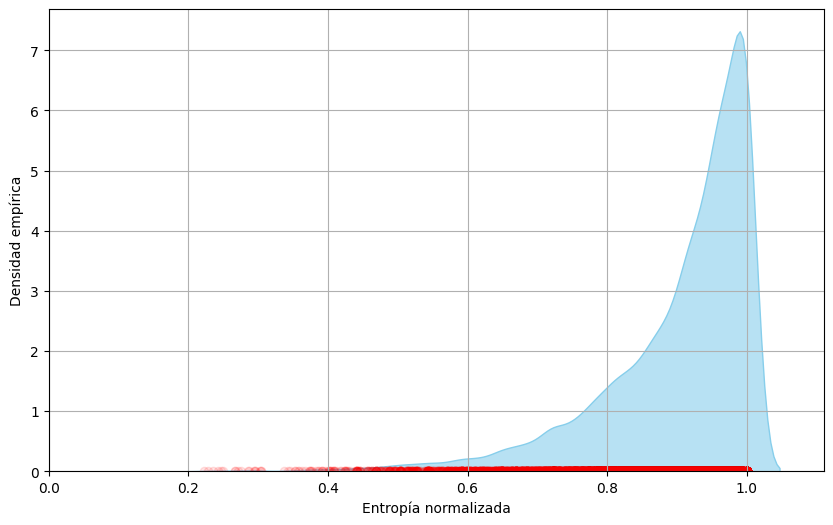

In [20]:
plt.figure(figsize=(10, 6))

# Gráfica de densidad empírica
sns.kdeplot(entropies_norm_nonzero, fill=True, color='skyblue', alpha=0.6)

# Marca de puntos en el eje horizontal
plt.scatter(entropies_norm_nonzero, np.zeros(len(entropies_norm_nonzero)), color='red', alpha=0.1)

plt.xlabel('Entropía normalizada')
plt.ylabel('Densidad empírica')
plt.xlim(0, 1.11)
plt.grid(True)
plt.savefig('graficas/entropias_normalizada_mibici_2019_sin_ceros.pdf', bbox_inches='tight')
plt.show()

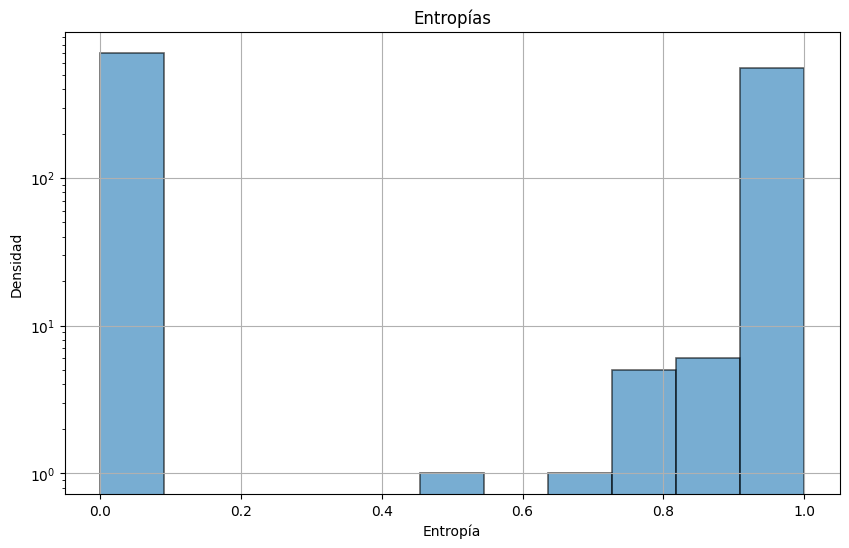

In [20]:
plt.figure(figsize=(10, 6))
bins = np.log2(len(entropies_norm)).astype(int) + 1
plt.hist(entropies_norm, bins=bins, alpha=0.6, edgecolor='black', linewidth=1.2)
plt.scatter(entropies_norm, np.zeros(len(entropies_norm)), color='red', alpha=0.1)
plt.xlabel('Entropía')
plt.ylabel('Densidad')
plt.yscale('log')
plt.title('Entropías')
plt.grid()
plt.show()

In [15]:
data_user1 = d[d['Usuario_Id'] == 106406]

In [16]:
data_user1.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_viaje
3316,8905309,106406,F,1961.0,2019-01-02 08:25:19,2019-01-02 08:31:30,86,86,6.183333
3392,8905427,106406,F,1961.0,2019-01-02 08:31:53,2019-01-02 08:56:16,86,70,24.383333
3703,8905893,106406,F,1961.0,2019-01-02 08:56:25,2019-01-02 09:11:34,70,70,15.150000
3850,8906066,106406,F,1961.0,2019-01-02 09:11:42,2019-01-02 09:24:27,70,86,12.750000
3940,8906244,106406,F,1961.0,2019-01-02 09:24:34,2019-01-02 09:40:32,86,71,15.966667


In [17]:
est_2019_mibici = leer_matriz(dir + 'Adj_mibici/matrices_estaciones/est_2019.txt')

In [33]:
counter1 = count_trips_mibici(data_user1, threshold=1)
plot_counter(counter1, est_2019_mibici, 'Viajes del Usuario 106406', save = True, dir = 'graficas/')

In [51]:
data_user2 = d[d['Usuario_Id'] == 244602]
data_user2.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_viaje
3387,8905421,244602,M,1970.0,2019-01-02 08:31:34,2019-01-02 08:59:05,39,12,27.516667
7214,8910507,244602,M,1970.0,2019-01-02 16:05:32,2019-01-02 16:14:54,39,78,9.366667
7327,8910627,244602,M,1970.0,2019-01-02 16:15:09,2019-01-02 16:31:12,78,80,16.050000
7478,8910798,244602,M,1970.0,2019-01-02 16:31:25,2019-01-02 16:41:57,80,39,10.533333
14081,8919262,244602,M,1970.0,2019-01-03 11:06:40,2019-01-03 11:18:39,39,39,11.983333


In [54]:
counter2 = count_trips_mibici(data_user2, threshold=1)
plot_counter(counter2, est_2019_mibici, 'User2', save = True, dir = 'graficas/', title_add = '244602')
print(compute_entropy(counter2))
print('Total de viajes:', counter2['counts'].sum())

2.8624497452503475
Total de viajes: 168


In [31]:
data_user3 = d[d['Usuario_Id'] == 325641]
data_user3.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_viaje
421,8901825,325641,M,1956.0,2019-01-01 12:08:01,2019-01-01 12:11:37,49,40,3.600000
524,8901960,325641,M,1956.0,2019-01-01 12:52:42,2019-01-01 13:02:46,40,49,10.066667
1442,8902978,325641,M,1956.0,2019-01-01 17:16:56,2019-01-01 17:21:59,49,48,5.050000
1461,8902997,325641,M,1956.0,2019-01-01 17:22:16,2019-01-01 17:32:07,48,62,9.850000
1504,8903040,325641,M,1956.0,2019-01-01 17:32:36,2019-01-01 17:42:39,62,49,10.050000


In [34]:
counter3 = count_trips_mibici(data_user3, threshold=1)
plot_counter(counter3, est_2019_mibici, 'Viajes del Usuario 325641', save = True, dir = 'graficas/')

In [4]:
K1 = np.load('test_dirac/K_0.0005.npy')
K2 = np.load('test_dirac/K_0.000875.npy')
K3 = np.load('test_dirac/K_0.00125.npy')
K4 = np.load('test_dirac/K_0.002.npy')

In [5]:
K = [K1, K2, K3, K4]

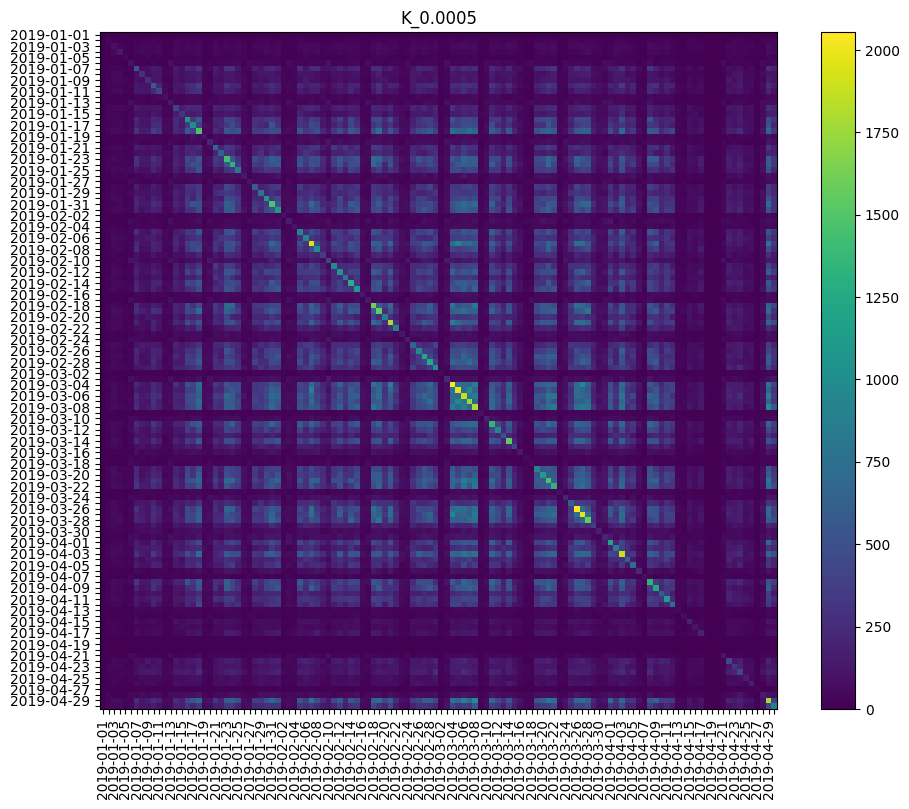

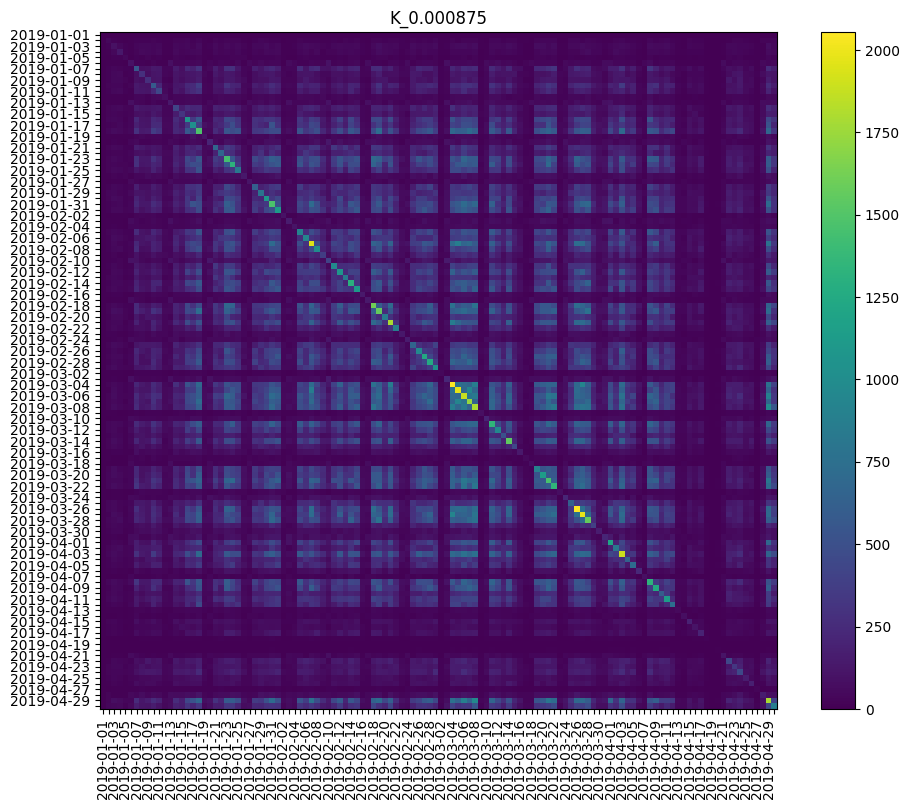

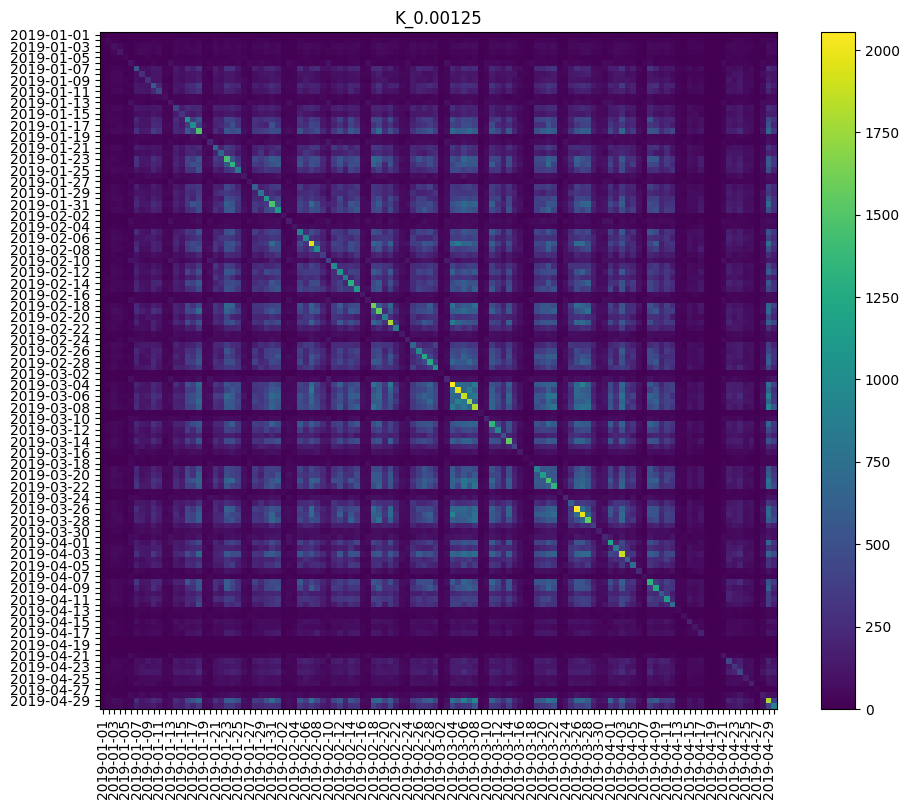

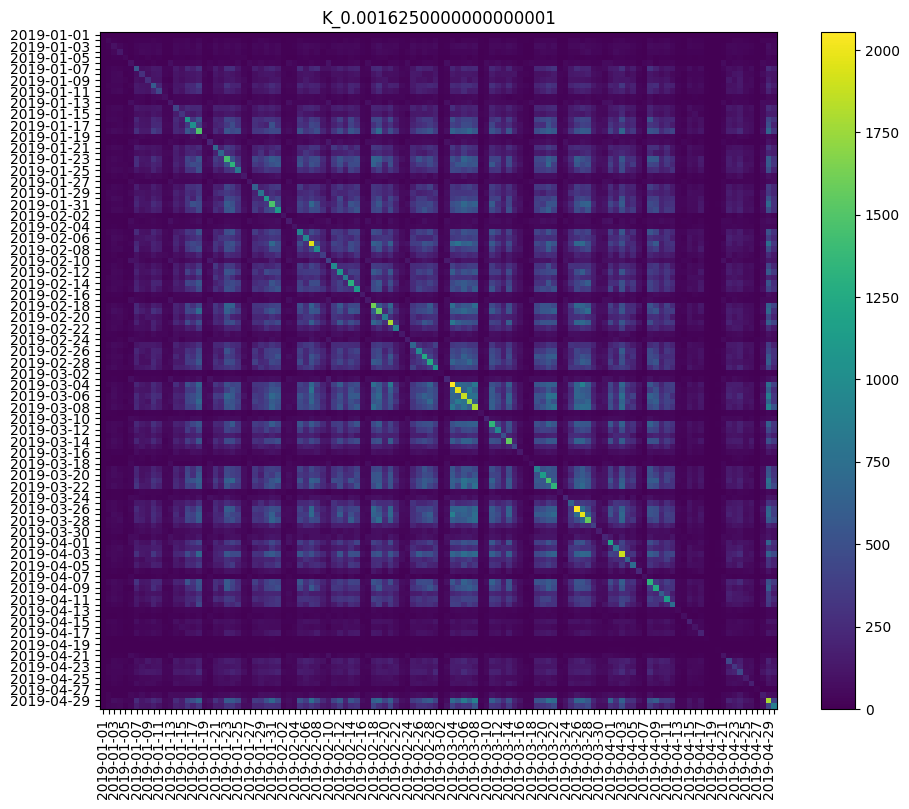

In [6]:
for i in range(4):
    plot_heatmap(K[i], f'K_{0.0005 + 0.000375*i}', dates)

In [4]:
K_cdmx = np.load('test_dirac/K_cdmx.npy')

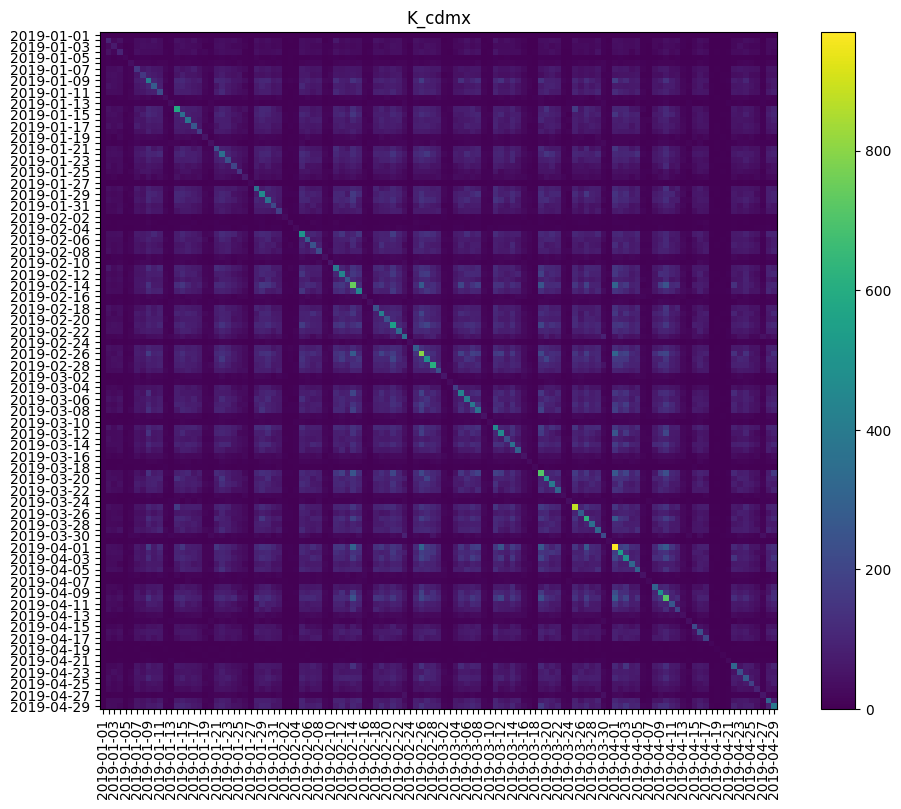

In [5]:
plot_heatmap(K_cdmx, 'K_cdmx', dates)